# Augendiagramm für QPSK und Kosinus-Rolloff-Filter

In [18]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

ECCpath = '../ECCpython'
if (not ECCpath==None) and (not ECCpath in sys.path):
    sys.path.append(ECCpath)

from Modulation.modulation import Modulation

# cardinality of modulation scheme
M = 4
# number of information bits to be generated
N_info_bits = 256

# number of bits per QPSK symbol
m = int(np.round(np.log2(M)))
# number of symbols obtained from information bits
N_symbols = int(N_info_bits / m)
time_symbol = np.arange(N_symbols)

# generate QPSK object
qpsk = Modulation(m=m, modulation_type='QAM')

# generate information bits u[k]
info_bits = np.random.randint(0,2,N_info_bits,dtype=int)

# modulate information bits using QPSK
d_qpsk = qpsk.modulate(info_bits)
    
# roll-off factor of Root-Raised-Cosine filter
r = (0.1, 0.25, 0.5, 0.75, 1.0)

# symbol duration in seconds
Ts = 1e-6
# oversampling factor
w = 32
# sampling rate in Hz
fa = w / Ts
# length of filter in number of symbols
N_rc_symbols = 32
# length of filter impulse response in samples
N_rc = N_rc_symbols*w

x_rrc = np.zeros((len(r),N_symbols*w+N_rc-1),dtype=complex)
x_rc = np.zeros((len(r),N_symbols*w+N_rc-1),dtype=complex)
for run in np.arange(len(r)):
    _,x_rrc[run,:] = qpsk.impulse_shaping(data=d_qpsk, filter_type='rrc', filter_length=N_rc, symbol_duration=Ts, sampling_rate=fa, rolloff=r[run])
    _,x_rc[run,:] = qpsk.impulse_shaping(data=d_qpsk, filter_type='rc', filter_length=N_rc, symbol_duration=Ts, sampling_rate=fa, rolloff=r[run])

time = (np.arange(N_symbols*w+N_rc-1)-N_rc/2) / w

start = int((N_rc-w)/2) 
stop  = start + N_symbols * w 
eye_time = np.arange(-Ts/2,Ts/2,1/fa) / Ts

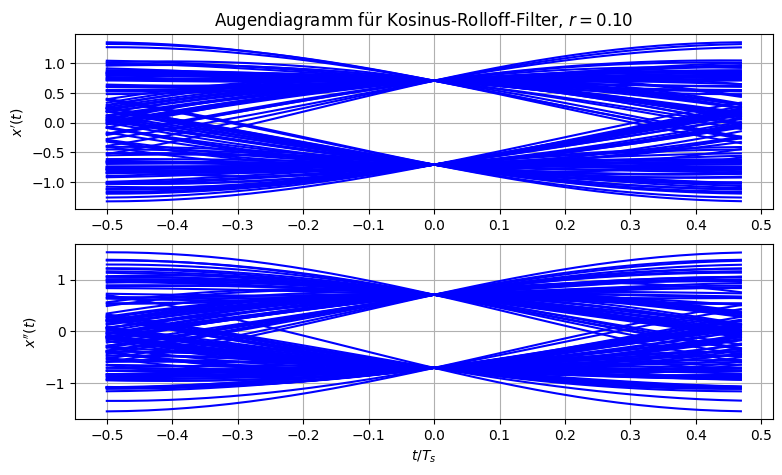

In [16]:
eye_rc = np.reshape(x_rc[0,start:stop],(w,N_symbols),order='f')
eye_rrc = np.reshape(x_rrc[0,start:stop],(w,N_symbols),order='f')

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(211)
ax.plot(eye_time,np.real(eye_rc), 'b-')
#plt.xlabel('$t/T_s$')
plt.ylabel('$x^{\prime}(t)$')
plt.xticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r[0]))
plt.grid(True)
#plt.axis([-0.5, 0.5, -2.0, 2.0])

ax = fig.add_subplot(212)
ax.plot(eye_time,np.imag(eye_rc), 'b-')
plt.xlabel('$t/T_s$')
plt.ylabel('$x^{\prime\prime}(t)$')
plt.xticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
#plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r[0]))
plt.grid(True)
#plt.axis([-0.5, 0.5, -2.0, 2.0])



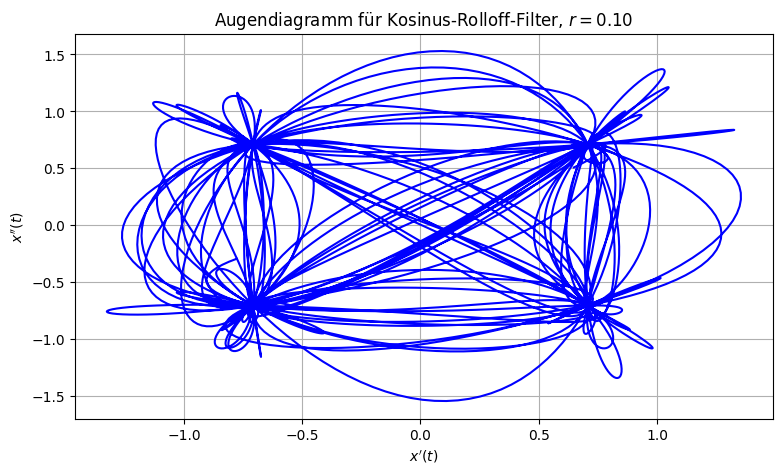

In [17]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(np.real(x_rc[0,start:stop]),np.imag(x_rc[0,start:stop]), 'b-')
plt.xlabel('$x^{\prime}(t)$')
plt.ylabel('$x^{\prime\prime}(t)$')
plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r[0]))
plt.grid(True)

erg = np.append(np.real(x_rc[0,start:stop].reshape((stop-start,1))),np.imag(x_rc[0,start:stop].reshape((stop-start,1))),axis=1)
np.savetxt('Results/NTpart3_auge_QPSK_rc01.txt',erg)
erg = np.append(np.real(x_rrc[0,start:stop].reshape((stop-start,1))),np.imag(x_rrc[0,start:stop].reshape((stop-start,1))),axis=1)
np.savetxt('Results/NTpart3_auge_QPSK_rrc01.txt',erg)

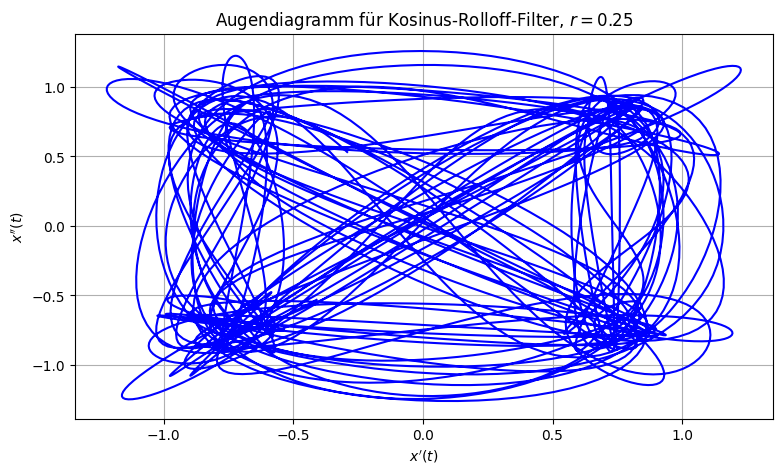

In [14]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(np.real(x_rc[1,start:stop]),np.imag(x_rc[1,start:stop]), 'b-')
plt.xlabel('$x^{\prime}(t)$')
plt.ylabel('$x^{\prime\prime}(t)$')
plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r[1]))
plt.grid(True)

erg = np.append(np.real(x_rc[1,start:stop].reshape((stop-start,1))),np.imag(x_rc[1,start:stop].reshape((stop-start,1))),axis=1)
np.savetxt('Results/NTpart3_auge_QPSK_rc025.txt',erg)
erg = np.append(np.real(x_rrc[1,start:stop].reshape((stop-start,1))),np.imag(x_rrc[1,start:stop].reshape((stop-start,1))),axis=1)
np.savetxt('Results/NTpart3_auge_QPSK_rrc025.txt',erg)

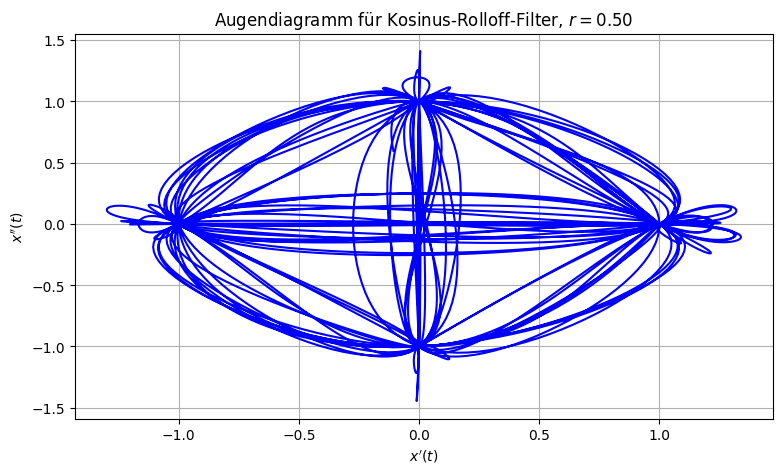

In [7]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(np.real(x_rc[2,start:stop]),np.imag(x_rc[2,start:stop]), 'b-')
plt.xlabel('$x^{\prime}(t)$')
plt.ylabel('$x^{\prime\prime}(t)$')
plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r[2]))
plt.grid(True)

erg = np.append(np.real(x_rc[2,start:stop].reshape((stop-start,1))),np.imag(x_rc[2,start:stop].reshape((stop-start,1))),axis=1)
np.savetxt('Results/NTpart3_auge_QPSK_rc05.txt',erg)
erg = np.append(np.real(x_rrc[2,start:stop].reshape((stop-start,1))),np.imag(x_rrc[2,start:stop].reshape((stop-start,1))),axis=1)
np.savetxt('Results/NTpart3_auge_QPSK_rrc05.txt',erg)

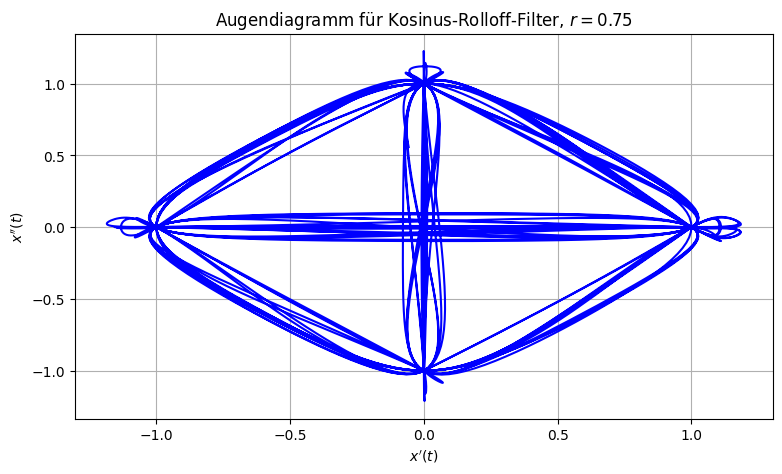

In [8]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(np.real(x_rc[3,start:stop]),np.imag(x_rc[3,start:stop]), 'b-')
plt.xlabel('$x^{\prime}(t)$')
plt.ylabel('$x^{\prime\prime}(t)$')
plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r[3]))
plt.grid(True)

erg = np.append(np.real(x_rc[3,start:stop].reshape((stop-start,1))),np.imag(x_rc[3,start:stop].reshape((stop-start,1))),axis=1)
np.savetxt('Results/NTpart3_auge_QPSK_rc075.txt',erg)
erg = np.append(np.real(x_rc[3,start:stop].reshape((stop-start,1))),np.imag(x_rrc[3,start:stop].reshape((stop-start,1))),axis=1)
np.savetxt('Results/NTpart3_auge_QPSK_rrc075.txt',erg)

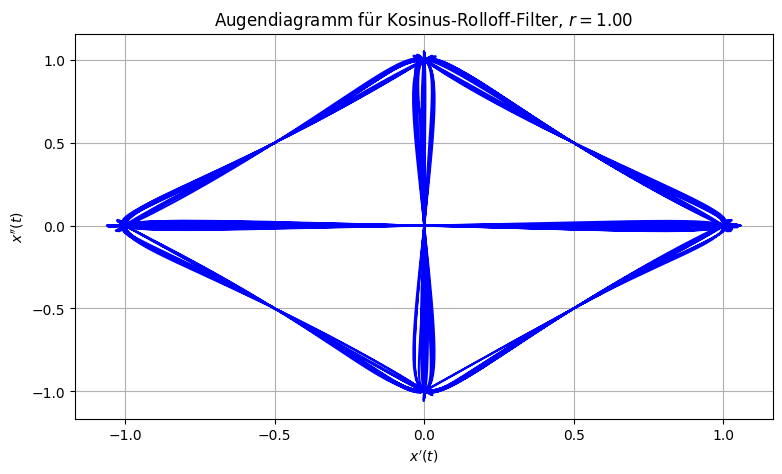

In [9]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(np.real(x_rc[4,start:stop]),np.imag(x_rc[4,start:stop]), 'b-')
plt.xlabel('$x^{\prime}(t)$')
plt.ylabel('$x^{\prime\prime}(t)$')
plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r[4]))
plt.grid(True)

erg = np.append(np.real(x_rc[4,start:stop].reshape((stop-start,1))),np.imag(x_rc[4,start:stop].reshape((stop-start,1))),axis=1)
np.savetxt('Results/NTpart3_auge_QPSK_rc10.txt',erg)
erg = np.append(np.real(x_rrc[4,start:stop].reshape((stop-start,1))),np.imag(x_rrc[4,start:stop].reshape((stop-start,1))),axis=1)
np.savetxt('Results/NTpart3_auge_QPSK_rrc10.txt',erg)